In [2]:
import os, sys
sys.path.append("../../")

import sympy as sp
from qympy.quantum_circuit.sp_circuit import Circuit

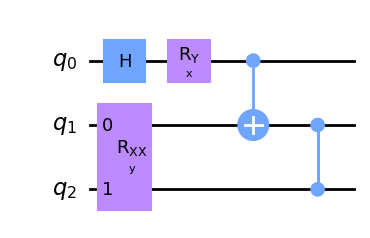

In [3]:
qc = Circuit(3)   # initialize a 3-qubit quantum circuit
qc.h(0)           # Hadamard gate on 0th qubit
qc.ry("x", 0)     # y-rotation on 0th qubit with theta = x
qc.rxx("y", 1, 2) # xx-rotation on 1st and 2nd qubits with theta = y
qc.cx(0,1)        # CNOT on 1st and 2nd qubits
qc.cz(1,2)        # CZ on 1st and 2nd qubits

qc.draw("mpl", filename=f"./example_circuit.png")

In [4]:
'''It would be a good habit to evolve the state first.
Although when using 'measure' qympy will automatically evolve if you haven't evolve.
We design in this way since we won't always need to know the final state for every case.'''

qc.evolve() # evolve the circuit
result = qc.measure(2, "Z") # measure the 2nd qubit in Z-basis

from contextlib import redirect_stdout
with open('example_circuit.txt', 'w') as f:
    # save sympy pretty print to txt file
    with redirect_stdout(f):
        sp.pprint(result)

result

-(-sqrt(2)*sin(x/2)/2 + sqrt(2)*cos(x/2)/2)**2*sin(y/2)**2 + (-sqrt(2)*sin(x/2)/2 + sqrt(2)*cos(x/2)/2)**2*cos(y/2)**2 - (sqrt(2)*sin(x/2)/2 + sqrt(2)*cos(x/2)/2)**2*sin(y/2)**2 + (sqrt(2)*sin(x/2)/2 + sqrt(2)*cos(x/2)/2)**2*cos(y/2)**2